# Homework 2

## Pair Programming Group Number: 8
## Members of Team: Michel Gonzalez

#### Practicing using numpy to do math, and more visualizations

More fun using the numerical package, numpy, a touch of pandas, and exercising your math vocabulary. 

In [1]:
# Your imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://gist.githubusercontent.com/yanyanzheng96/8fe13cc4b7c6a1391d4841018340a627/raw/f17479a580783a810cfe119186e63b5b28a87b4c/melb_data.csv'
df = pd.read_csv(url)
df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Question 1 - Discrete PDF
Create a vector of 1000 random numbers from a Normal distribution with mean 5 and standard deviation 10 and plot the discrete probability density function of that vector using a histogram.  You should use [numpy random normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to create the vector. Always label your axes and give your plots titles (this holds for all questions). 

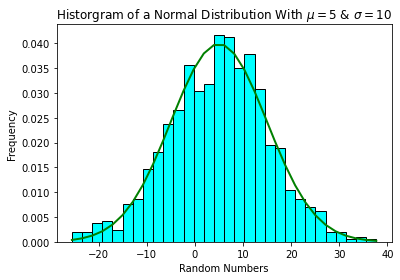

In [2]:
# mean and standard deviation
mu, sigma = 5, 10

# Creares a vector of 1000 random numbers
# from a normal distribution wiht mean of 5
# and standard deviation 10
s = np.random.normal(mu, sigma, 1000)

# Plots the historgram of the series s based on the  normal distribution
count, bins, ignored = plt.hist(s, 30, density=True, color = 'aqua', edgecolor = 'black')

# plots the Gaussian distribution function with a mean of 5 and stnadard devation of 10
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='g')

plt.xlabel('Random Numbers')

plt.ylabel('Frequency')

plt.title('Historgram of a Normal Distribution With $\mu = 5$ & $\sigma = 10$')

plt.show()

## Question 2 - Discrete CDF

Create a discrete cumulative density function plot using the same vector as the last question using a line graph.
Annotate the point, $x$, where 80% of the data < $x$ and 20% of the data is greater than $x$.  You can use the matplotlib pyplot function [plot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html) to draw the line, and to draw a star at the point $x$.  Use the [legend](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.legend.html) function to annotate the graph. 

Text(0.5, 1.0, 'Discrete Cumulative Denisty Fucntion')

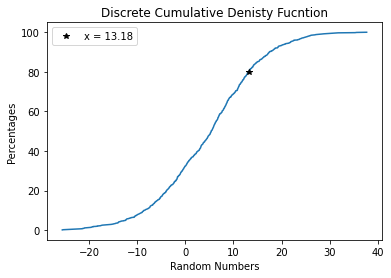

In [3]:
# Creates an empty list to hold the cumulative density values
density = []

# sorts the random numbers array and gets the length
s.sort()

length = len(s)

# creates and appends the cumulative values
# for the density array
sum = 0

for i in range(0, length):

  sum += 1/length

  density.append(sum * 100)

# finds the point x (density[i]) where 80% of the data is below x
i = 0

while(density[i] < 80):

  i += 1

# plots the denisty function as a fucntion of the sorted array s

plt.plot(s, density)

# plots the point x for the 80th percentile

plt.plot(s[i], density[i], '*', color = 'black', label = 'x = ' + str(format(s[i], '.2f')))

plt.legend()

plt.xlabel('Random Numbers')

plt.ylabel('Percentages')

plt.title('Discrete Cumulative Denisty Fucntion')




## Question 3 - Univariate Analysis

Load in the data from melb_data.csv into a pandas DataFrame.  Create a box and whisker graph comparing the prices in the suburbs:
  - Reservoir         
  - Richmond          
  - Bentleigh East
  
You should use the [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) function, with the parameter `by`. 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, '')

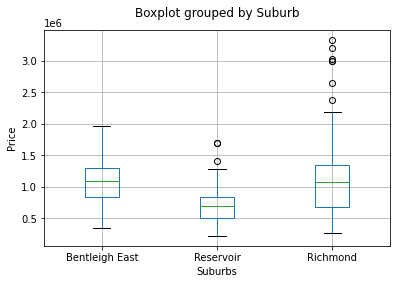

In [4]:
# Creates a new data frame with only the suburbs and prices
df_subs_price = df[['Suburb', 'Price']]

# Cleans data from all NaN submissions 
df_subs_price_noNA = df_subs_price[df_subs_price['Price'].notna()]

# Creates a new data frame with onyl the specified suburbs with their prices
df_subs_price_spec = df_subs_price_noNA[(df_subs_price_noNA['Suburb'] == 'Richmond') | (df_subs_price_noNA['Suburb'] == 'Reservoir') | (df_subs_price_noNA['Suburb'] == 'Bentleigh East')]

# Plots the boxplot of the prices based on the suburb 
df_subs_price_spec.boxplot(by='Suburb')

plt.xlabel('Suburbs')

plt.ylabel('Price')

# For some reason the title was auto generated to be 'price'
# and its own title that is on the plot
# not sure how to suppress the other title but
# I was able to get rid of the 'price' title and
# leave the other
plt.title('')

## Question 4 - Rotation with Matrices

Consider the vectors:
  - $\alpha$ which begins at (0,0) and ends at (1,1)
  - $\beta$ which begins at (1,1) and ends at (0,1)
  
Draw $\alpha$ and $\beta$ using a line graph using a different color for each vector.

Now, using matrix multiplication rotate the vectors 45 degrees (clockwise or counter-clockwise, you choose!) and draw the result.  You must use numpy's [matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) to accomplish the rotation. Numpy also has functions for `sin` and `cos`.  You should also get [pi](https://numpy.org/doc/stable/reference/constants.html?highlight=pi#numpy.pi) from the numpy package. 

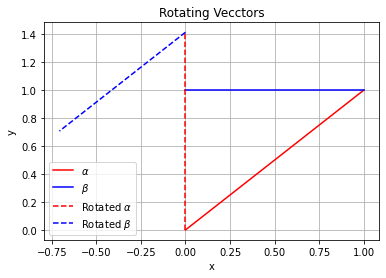

In [7]:
# Creates vectors (2-D lits) from the coordinate points
# the first list are the x coordinates and
# the second list are the y coordinates

a_vec = np.array([[0,1], 
                  [0,1]])

b_vec = np.array([[1,0], 
                  [1,1]])

# rotates both vectors counter clockwise using the
# the rotation matrix
#
#  R =  |cos(t),-sin(t)|, where t is an angle in radians
#       |sin(t), cos(t)|

# creates the radian version of 45 degrees and
# assignes the sin and cos values
theta = np.pi/4

c, s = np.cos(theta), np.sin(theta)

R = np.array([[c, -s], [s, c]])

a_rot = np.matmul(R, a_vec)

b_rot = np.matmul(R, b_vec)

plt.plot(a_vec[0], a_vec[1], color = 'red', label = r'$\alpha$')

plt.plot(b_vec[0], b_vec[1], color = 'blue', label = r'$\beta$')

plt.plot(a_rot[0], a_rot[1], '--', color = 'red', label = r'Rotated $\alpha$')

plt.plot(b_rot[0], b_rot[1], '--', color = 'blue', label = r'Rotated $\beta$')

plt.xlabel('x')

plt.ylabel('y')

plt.title('Rotating Vecctors')

plt.grid()

plt.legend()

plt.show()

## Question 5 - Solving Systems of Equations with Matrices

Consider the following system of equations:
  - $2x +  y + z = 5$
  - $4x - 6y     = -2$
  - $-2x + 7y + 2z = 9$
  
Convert the coefficients of the system of equations to a matrix, $A$, where the first column contains the $x$ coefficients, the second column contains the $y$ coefficients, and the third column contains the $z$ coefficients. 
Covert the values on the right hand side to a (3,1) vector, $b$, (make sure you keep all the numbers in order.  Now, solve for $(x,y,z)$ by inverting $A$ and multiplying by $b$, eg, $A^{-1} * b$. 

Use the numpy [linear algebra inverse function](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) to find $A^{-1}$.

In [6]:
# Creates the matrix A and vector b
A = np.matrix([[2, 1, 1], 
              [4, -6, 0], 
              [-2, 7, 2]])

b = np.array([[5],
              [-2], 
              [9]])

# Finds the inverse of matrix A
A_inv = np.linalg.inv(A)
# Solves for the solution vector X
# X = A_inv * b
X = np.matmul(A_inv, b)

print('The solution to the system of equations: \n x = ' + str(int(X[0])) + '\n y = ' + str(int(X[1])) + '\n z = ' + str(int(X[2])) + '\n')

The solutions to the system of equations: 
 x = 1
 y = 1
 z = 2

